In [1]:
'''
Idea:
We want to gen algs based on regrips instead of brute forcing moves
For this, we need a way to map grips based on which moves we do
We want a fast way to do this, so we will use numpy arrays and number each move and grip
The idea is then: 
* use a 2d array move_to_grip. the first dimension is the grip number, and the second is the move number
* to find the grip after a move, we just do move_to_grip[grip, move]
* for grips, we will use 0 if the grip is not possible, and 1, 2, 3,... if it is based on which grip it is
* for moves, we will use respectively R, R', R2, L, L', L2, U, U', U2, D, D', D2, F, F', F2, B, B', B2 equal to 0, 1, 2, 3, 4, 5, 6, 7, 8, 9,..., 17

To gen algs we can do the following:
We define a depth that we're confortable with, that is the number of moves in an alg
Then we can traverse the tree of algs by starting with a given grip, then doing all possible moves from that grip
We can find the viable moves by looking at the ids of the grips not equal to 0
We can then do this recursively until we reach the depth we want
'''

"\nIdea:\nWe want to gen algs based on regrips instead of brute forcing moves\nFor this, we need a way to map grips based on which moves we do\nWe want a fast way to do this, so we will use numpy arrays and number each move and grip\nThe idea is then: \n* use a 2d array move_to_grip. the first dimension is the grip number, and the second is the move number\n* to find the grip after a move, we just do move_to_grip[grip, move]\n* for grips, we will use 0 if the grip is not possible, and 1, 2, 3,... if it is based on which grip it is\n* for moves, we will use respectively R, R', R2, L, L', L2, U, U', U2, D, D', D2, F, F', F2, B, B', B2 equal to 0, 1, 2, 3, 4, 5, 6, 7, 8, 9,..., 17\n\nTo gen algs we can do the following:\nWe define a depth that we're confortable with, that is the number of moves in an alg\nThen we can traverse the tree of algs by starting with a given grip, then doing all possible moves from that grip\nWe can find the viable moves by looking at the ids of the grips not equ

In [2]:
%run ../cube/Cube.ipynb

import numpy as np
import random
import time
from numba import njit

Support algs imported!
Cube initiated


In [3]:
move_list = np.array(['R', "R2", "R'", 'L', "L2", "L'", 'U', "U2", "U'", 'D', "D2", "D'", 'F', "F2", "F'", 'B', "B2", "B'", 'x', "x2", "x'", 'y', "y2", "y'", 'z', "z2", "z'", "M", "M2", "M'", "S", "S2", "S'", "E", "E2", "E'", "r", "r2", "r'", "l", "l2", "l'", "u", "u2", "u'", "d", "d2", "d'", "f", "f2", "f'", "b", "b2", "b'"])
move_to_id = {move: i for i, move in enumerate(move_list)}
id_to_move = {i: move for i, move in enumerate(move_list)}

@njit
def array_to_alg(array):
    # no -1s as moves
    return " ".join([move_list[id] for id in array if id != -1])

array_to_alg(np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 17,32]))

"R R2 R' L L2 L' U U2 U' D D2 D' F F2 F' B B2 B' S'"

In [4]:
'''
grips:
0: none (used when a move is not possible)
1: homegrip
2: homegrip + R
3: homegrip + R'
4: homegrip + R2/R2'
5: homegrip + L
6: homegrip + L'
we can add more later

We want to make the table move_to_grip

We can write it like this:

grip: [18 new grips, 0-10]

to keep track:
*: [R, R2,R',L, L2,L',U, U2,U',D, D2,D',F, F2,F',B, B2,B']

0: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
1: [2, 4, 3, 5, 6, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0],
2: [4, 3, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2],
3: [1, 2, 4, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
4: [0, 1, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0],
5: [0, 0, 1, 0, 1, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0],
6: [0, 0, 0, 1, 0, 5, 6, 6, 6, 6, 6, 6, 6, 0, 0, 6, 6, 6]

we can extend it later
'''

# write this as a 2D-array

# move_to_grip = np.array(
#        [
#       #[R, R2,R',L, L2,L',U, U2,U',D, D2,D',F, F2,F',B, B2,B']
#        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 0
#        [2, 4, 3, 5, 0, 6, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0], # homegrip
#        [4, 3, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2], # homegrip + R
#        [1, 2, 4, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], # homegrip + R'
#        [0, 1, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0], # homegrip + R2/R2'
#        [0, 0, 1, 0, 6, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0], # homegrip + L
#        [0, 0, 0, 1, 5, 0, 6, 6, 6, 6, 6, 6, 6, 0, 0, 6, 6, 6], # homegrip + L'
#        ])


move_to_grip = np.array(
       [
      #[R, R2,R',L, L2,L',U, U2,U',D, D2,D',F, F2,F',B, B2,B']
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 0
       [2, 4, 3, 5, 0, 6, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0], # 1 homegrip
       [4, 3, 1, 7, 0, 0,10,10,10,11,11,11, 0, 2, 2, 8, 8, 8], # 2 homegrip + R
       [1, 2, 4, 0, 0, 0,12,12,12,13,13,13, 3, 3, 3, 0, 0, 0], # 3 homegrip + R'
       [0, 1, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 4 homegrip + R2/R2'
       [0, 0, 7, 0, 6, 1,14,14,14,15,15,15, 5, 5, 5, 0, 0, 0], # 5 homegrip + L
       [0, 0, 0, 1, 6, 0,16,16,16,17,17,17, 6, 0, 0, 9, 9, 9], # 6 homegrip + L'
       [5, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 7, 7, 7, 0, 0, 0], # 7 homegrip + R' L
       # we only allow B moves if we can undo the setup right after, example R B R'
       [0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 8], # 8 homegrip + R B/B'/B2
       [0, 0, 0, 1, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 9, 9], # 9 homegrip + L' B/B'/B2
      #[R, R2,R',L, L2,L',U, U2,U',D, D2,D',F, F2,F',B, B2,B']
       [4, 3, 1, 0, 0, 0,10,10,10, 0, 0, 0, 0, 2, 2, 8, 8, 8], # 10 homegrip + R U/U'/U2
       [4, 3, 1, 0, 0, 0, 0, 0, 0,10,10,10, 0, 2, 2, 0, 0, 0], # 11 homegrip + R D/D'/D2 # add 8s?
       [1, 2, 4, 0, 0, 0,11,11,11, 0, 0, 0, 3, 3, 3, 0, 0, 0], # 12 homegrip + R' U/U'/U2
       [1, 2, 4, 0, 0, 0, 0, 0, 0,11,11,11, 3, 3, 3, 0, 0, 0], # 13 homegrip + R' D/D'/D2
      #[R, R2,R',L, L2,L',U, U2,U',D, D2,D',F, F2,F',B, B2,B']
       [0, 0, 0, 0, 6, 1, 0, 0, 0, 0, 0, 0, 5, 5, 5, 0, 0, 0], # 14 homegrip + L U/U'/U2
       [0, 0, 0, 0, 6, 1, 0, 0, 0, 0, 0, 0, 5, 5, 5, 0, 0, 0], # 15 homegrip + L D/D'/D2
       [0, 0, 0, 1, 5, 0, 0, 0, 0, 0, 0, 0, 6, 6, 0, 9, 9, 9], # 16 homegrip + L' U/U'/U2
       [0, 0, 0, 1, 5, 0, 0, 0, 0, 0, 0, 0, 6, 6, 0, 0, 0, 0], # 17 homegrip + L' D/D'/D2
       ])

In [5]:
# function to invert an alg
@njit
def invert_alg_array(alg_array):
    inv_array = alg_array[::-1]
    inv_array = np.concatenate((inv_array[inv_array!=-1], 3*inv_array[inv_array==-1]))
    return inv_array + 2*(1-inv_array%3)

# run once to compile
invert_alg_array(np.array([0, -1, -1, -1]))

array([ 2, -1, -1, -1], dtype=int64)

In [6]:
@njit
def cancel_alg_array(alg_array): 
    # cancels an alg array
    changes = True
    pointer = -1
    while changes:
        changes = False
        alg_array = np.concatenate((alg_array[alg_array != -1], alg_array[alg_array == -1]))

        for i in range(len(alg_array)-1):
            if alg_array[i] == -1:
                pointer = i
                break # we can stop here because we know that the rest of the array is -1
            if alg_array[i] == -2:
                alg_array[i] = -1 # we don't need to track this change because it is not a move
                changes = True
                continue
            if alg_array[i]//3 == alg_array[i+1]//3:
                # if it cancels fully, the new move is -2 (which we need to change to -1 later)
                # if it cancels partially, the current move is set to -1 and the next move is changed to the new move

                base_move = alg_array[i]//3*3
                total_rotation = (2 + alg_array[i]%3 + alg_array[i+1]%3)%4-1
                alg_array[i] = -1
                if total_rotation >= 0:
                    alg_array[i+1] = base_move + total_rotation
                else:
                    alg_array[i+1] = -2
                changes = True
        if alg_array[-1] == -2:
            alg_array[-1] = -1

    return alg_array[:pointer]

@njit
def cancel_alg_arrays(alg_array1, alg_array2):
    alg_array = np.concatenate((alg_array1, alg_array2, np.array([-1])))
    return cancel_alg_array(alg_array)

alg1, alg2 = np.array([ 2,8,14]), np.array([6, 2, 3])
cancel_alg_arrays(alg1, alg2)

# bridge_array = np.array([30, 2, 8, 0, 6, 0, 32])
# R = np.array([2])
# array_to_alg(cancel_alg_arrays(bridge_array, R))

array([ 2,  8, 14,  6,  2,  3], dtype=int64)

In [7]:
@njit
def get_valid_moves(grip, last_move):
    init_moves = np.where(move_to_grip[grip])[0]
    return init_moves[init_moves//3 != last_move//3]

@njit
def check_rlr(alg_array):
    # checks that if we have something like R L, R is always before L
    # so R L (0,3) is fine, but L R (3,0) is not
    # returns True if it is not fine, f

    if len(alg_array) < 2:
        return True
    
    for i in range(len(alg_array)-1):
        if alg_array[i]//6 == alg_array[i+1]//6 and alg_array[i]<alg_array[i+1]:
            return False
    return True

@njit
def check_rlr2(alg_array):
    # same as above, but assumes the array has length 2, so we don't need to check that nor loop
    if alg_array[0]//6 == alg_array[1]//6 and alg_array[0]<alg_array[1]:
        return False
    return True

In [8]:
@njit
def gen_algs(length, start_grip = 1): # todo: deal with R L R and stuff like that

    algs = np.zeros((5+10**length, length), dtype = np.int8) # the exponential factor seems to be about 10.14, so we need something bigger. This is not the case for the first few lengths, so we add 5 to be safe (this is tested to work for start_grip = 1)
    i = 0 # keep track of the number of algs we have

    current_grip = np.zeros(length+1, dtype = np.int8) # first grip is the start grip
    current_grip[0] = start_grip # this will stay unchanged
    current_alg = -np.ones(length+1, dtype = np.int8)
    current_alg[0] = -1 # not a possible move, so we can start at 0

    pointer = 1 # start pointing at the first move (we use this for both algs and grips)

    while pointer > 0:
        # criterion for adding algs: pointer == length
        if pointer == length:
            # if the alg has rlr without the first move, we don't need to check all the other moves
            if check_rlr(current_alg[1:-1]):
                # loop though and add the alg to the array if the last move doesn't regrip
                valid_moves = get_valid_moves(current_grip[pointer-1], current_alg[pointer-1])
                for move in valid_moves:
                    current_alg[pointer] = move
                    if check_rlr2(current_alg[-2:]): # check if the last three moves are rlr
                        algs[i] = current_alg[1:]
                        i += 1
            # then we go back one step (instead of setting current_alg[pointer] to 18 and dealing with it next cycle)
            current_alg[pointer] = -1
            pointer -= 1
            continue

        # if we haven't gone back, we increment the current move, set the next grip, and increment the pointer
        current_alg[pointer] += 1
        # make sure the move is valid: 1) it's a valid move, 2) it's not on the same face as the previous move, and 3) it's a regripless move
        while True: #current_alg[pointer] < 18 and current_alg[pointer]//3 == current_alg[pointer-1]//3 and move_to_grip[current_grip[pointer-1], current_alg[pointer]] != 0:
            if current_alg[pointer] == 18:
                break
            if current_alg[pointer]//3 != current_alg[pointer-1]//3 and move_to_grip[current_grip[pointer-1], current_alg[pointer]] != 0:
                break
            current_alg[pointer] += 1
        # criterion for going back: current_alg[pointer] == 18
        if current_alg[pointer] == 18:
            current_alg[pointer] = -1
            pointer -= 1
            continue
        
        current_grip[pointer] = move_to_grip[current_grip[pointer-1], current_alg[pointer]]
        pointer += 1

    return algs[:i]

# run once to compile
algs = gen_algs(2)

In [271]:
def gen_algs_cumulative(max_length, start_grip = 1, min_length = 1):
    # generates algs of length min_length to max_length
    algs = []
    for i in range(min_length, max_length+1):
        new_algs = gen_algs(i, start_grip)
        # pad with max_length - i -1s
        new_algs = np.pad(new_algs, ((0,0),(0,max_length-i)), constant_values = -1)
        algs.append(new_algs)

    return np.concatenate(algs)

N = 8
start_grip = 3
algs = gen_algs_cumulative(N, start_grip)
len(algs)

13458858

In [272]:
def gen_table(algs): # TODO: use np arrays instead of dicts
    # we won't bother creating a Cube object, we will just use the array-based alg
    table = {}
    t = time.time()
    print(f"Genning table based on {len(algs)} algs")
    cubestate = np.array([0,0,0,1,1,1,1,1,1,0,0,0,2,2,2,2,2,2,0,0,0,3,3,3,3,3,3,0,0,0,4,4,4,4,4,4,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,5,5]) # LL removed
    for i, alg in enumerate(algs):
        if i and i%(len(algs)//100) == 0:
            print(f"{i} ({i/len(algs)*100:.2f}%) algs added in {time.time()-t:.2f} seconds")

        cubestate = _apply_int_moves(cubestate, invert_alg_array(alg))
        ID = id_from_state(cubestate)
        if ID not in table:
            table[ID] = [alg]
        else:
            table[ID].append(alg)
        cubestate = _apply_int_moves(cubestate, alg)
    
    return table

table = gen_table(algs)
len(table)

Genning table based on 13458858 algs
134588 (1.00%) algs added in 1.85 seconds
269176 (2.00%) algs added in 3.41 seconds
403764 (3.00%) algs added in 5.31 seconds
538352 (4.00%) algs added in 7.21 seconds
672940 (5.00%) algs added in 9.08 seconds
807528 (6.00%) algs added in 10.76 seconds
942116 (7.00%) algs added in 12.49 seconds
1076704 (8.00%) algs added in 16.88 seconds
1211292 (9.00%) algs added in 18.64 seconds
1345880 (10.00%) algs added in 20.28 seconds
1480468 (11.00%) algs added in 21.87 seconds
1615056 (12.00%) algs added in 23.29 seconds
1749644 (13.00%) algs added in 24.80 seconds
1884232 (14.00%) algs added in 26.35 seconds
2018820 (15.00%) algs added in 27.94 seconds
2153408 (16.00%) algs added in 29.52 seconds
2287996 (17.00%) algs added in 31.04 seconds
2422584 (18.00%) algs added in 32.51 seconds
2557172 (19.00%) algs added in 34.05 seconds
2691760 (20.00%) algs added in 35.56 seconds
2826348 (21.00%) algs added in 37.17 seconds
2960936 (22.00%) algs added in 38.83 se

9878847

In [273]:
# make custom bridge

# S R' U' R U R S'
bridge_array = np.array([30, 2, 8, 0, 6, 0, 32])
cubestate = np.array(range(54)) #normal mode
for i in bridge_array: # custom bridge
    cubestate = _apply_int_moves(cubestate, np.array([i]))

bridge = cubestate.copy()

# cube = Cube()
# cube.apply_int_moves(bridge_array)
# cube.plot()

bridge_array = np.array([-1]) # no bridge

In [274]:
def gen_LL_algs(algs, table):
    # we won't bother creating a Cube object, we will just use the cubestate array
    LL_algs = []
    t = time.time()
    print(f"Genning LL algs based on {len(algs)} algs")

    cubestate = np.array([0,0,0,1,1,1,1,1,1,0,0,0,2,2,2,2,2,2,0,0,0,3,3,3,3,3,3,0,0,0,4,4,4,4,4,4,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,5,5]) # LL removed
    for i, setup in enumerate(algs):
        if i and i%(len(algs)//100) == 0:
            # make it unique
            LL_algs = list(set(tuple(map(tuple, LL_algs))))
            print(f"{i} ({i/len(algs)*100:.2f}%) setups checked in {time.time()-t:.2f} seconds. {len(LL_algs)} LL algs found")
            
        # we don't want to start nor stop with a U as that's redundant. We have to check for D starts in case D in the end isnt fingertrickable
        if setup[0]//3 == 2:
            continue
        if setup[-1]//3 == 2:
            continue
        setup = cancel_alg_arrays(setup, bridge_array)
        cubestate = _apply_int_moves(cubestate, setup)
        ID = id_from_state(cubestate)
        if ID in table:
            for finish in table[ID]:
                alg = cancel_alg_arrays(setup, finish)

                if len(alg) == 0:
                    continue
                if alg[0]//3 == 2 or alg[-1]//3 == 2: # we don't want to end with U
                    continue
                if alg[0]//3 == 3 and alg[-1]//3 == 3: # if we start and end with D*, we remove it as we only need to do it once
                    continue
                # print(array_to_alg(setup),"-", array_to_alg(finish),"-", array_to_alg(alg))
                # print(setup, finish, alg)
                if check_rlr(alg):
                    LL_algs.append(alg)
        cubestate = _apply_int_moves(cubestate, invert_alg_array(setup))
    
    LL_algs = list(set(tuple(map(tuple, LL_algs))))
    return LL_algs

LL_algs = gen_LL_algs(algs, table)
print(len(LL_algs))

Genning LL algs based on 13458858 algs
134588 (1.00%) setups checked in 1.94 seconds. 6263 LL algs found
269176 (2.00%) setups checked in 4.62 seconds. 11455 LL algs found
403764 (3.00%) setups checked in 7.23 seconds. 14581 LL algs found
538352 (4.00%) setups checked in 9.82 seconds. 17488 LL algs found
672940 (5.00%) setups checked in 12.21 seconds. 20053 LL algs found
807528 (6.00%) setups checked in 12.46 seconds. 20053 LL algs found
942116 (7.00%) setups checked in 12.74 seconds. 20053 LL algs found
1076704 (8.00%) setups checked in 13.64 seconds. 20251 LL algs found
1211292 (9.00%) setups checked in 15.89 seconds. 20522 LL algs found
1345880 (10.00%) setups checked in 18.13 seconds. 20765 LL algs found
1480468 (11.00%) setups checked in 20.69 seconds. 24562 LL algs found
1615056 (12.00%) setups checked in 23.38 seconds. 28046 LL algs found
1749644 (13.00%) setups checked in 25.98 seconds. 31529 LL algs found
1884232 (14.00%) setups checked in 28.51 seconds. 35969 LL algs found
20

In [275]:
@njit
def regripless(alg, grip = 1):
    # returns True if regripless, False if not
    for move in alg:
        if move_to_grip[grip, move] == 0:
            return False
        grip = move_to_grip[grip, move]
    return True

# check number of regripless algs
count = 0
for alg in LL_algs:
    if regripless(alg, start_grip): # start_grip defined above
        count += 1
print(count)

49629


In [276]:
# sort algorithm
def score_alg(alg):
    # gives a score based on the number of moves, then the moves themselves
    score = 3*len(alg)
    score -= 2*(alg[0]//3 == 0) # start with R*
    score -= (alg[0]//3 == 2) # start with U*
    score -= (alg[0]//3 == 4) # starts with F*
    for i,move in enumerate(alg):
        score += (move%3==1) # double moves
        score += (move%6>2) # RUF > LDB
    return score

# sort by length
LL_algs = sorted(LL_algs, key = lambda x: score_alg(x))
LL_algs_str = [array_to_alg(alg) for alg in LL_algs]
for i,alg in enumerate(LL_algs_str):
    print(f"{i+1}: {alg}")

1: R' U' F' U F R
2: R' F' U' F U R
3: F U R U' R' F'
4: F R U R' U' F'
5: F' U' L' U L F
6: F' L' U' L U F
7: R' U2 R U R' U R
8: R' U' R U' R' U2 R
9: L U F U' F' L'
10: R U R' U R U2 R'
11: B' R' U' R U B
12: L F U F' U' L'
13: R U2 R' U' R U' R'
14: F U F' U F U2 F'
15: F' U' F U' F' U2 F
16: F' U2 F U F' U F
17: F U2 F' U' F U' F'
18: R' U' R' F R F' U R
19: R' F R F' U' F' U F
20: R' U' F R' F' R U R
21: R' F2 L F L' F R
22: R U R' U' R' F R F'
23: R' F' L F' L' F2 R
24: F U R' F R F' U' F'
25: F R' F' R U R U' R'
26: F U F R' F' R U' F'
27: F' U' F U F R' F' R
28: F R2 B' R' B R' F'
29: R B' R' F R B R' F'
30: R B R' F R B' R' F'
31: B' R' F R' F' R2 B
32: R U2 R' U2 R' F R F'
33: R' F R B' R' F' R B
34: R' F R F' U2 F' U2 F
35: R' F' L F R F' L' F
36: R' F' L' U L U' F R
37: R U R' F' L' U' L F
38: R' F' U L' U' L F R
39: B' R2 F R F' R B
40: R' F' R B' R' F R B
41: F R B' R' F' R B R'
42: R' U' F U F' R F U' F'
43: R' U' R F R' U R U' F'
44: F' U2 F U2 F R' F' R
45: F' U' L F'

In [277]:
# save to file

# with open("LL_algs_gripbased.txt", "w") as f:
#     for alg in LL_algs_str:
#         f.write(alg+"\n")

cube = Cube(1)
cube

         36 37 38
         39 40 41
         42 43 44
27 28 29  0 1 2  9 10 11  18 19 20
30 31 32  3 4 5  12 13 14  21 22 23
33 34 35  6 7 8  15 16 17  24 25 26
         45 46 47
         48 49 50
         51 52 53

In [278]:
# make a dict of the algs
# for each alg, apply the inverse to the solved state
# then we check if the state is in the dict for all 4 AUFs
# if it's not, we add it to the dict
# if it is, we add the alg to the list of algs for that state

@njit
def check_OLL_solved(cubestate):
    for i in [36,37,38,39,41,42]:
        if cubestate[i] != 5:
            return False
    return True

@njit
def check_ZBLL(cubestate):
    for i in [37,39,41]:
        if cubestate[i] != 5:
            return False
    return True

def gen_LL_algs_dict(LL_algs, no_regrips = True, start_grip = 1):
    # LL_algs: list of LL algs
    # no_regrips: if True, only gen algs that don't regrip
    # start_grip: the grip to start with, only applies if no_regrips is True
    LL_algs_dict = {}
    
    idsLL = np.array([0,1,2,9,10,11,18,19,20,27,28,29,37,39,41,43])
    for alg in LL_algs:
        cubestate = np.array([1]*9+[2]*9+[3]*9+[4]*9+[5]*9+[6]*9) #normal mode
        # cubestate = np.array([0,0,0,1,1,1,1,1,1,0,0,0,2,2,2,2,2,2,0,0,0,3,3,3,3,3,3,0,0,0,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6]) # PLL removed, gens only OLL
        alg = np.array(alg)
        inv = invert_alg_array(alg)
        cubestate = _apply_int_moves(cubestate, alg)
        # # check that OLL is solved (for getting only PLLs)
        # if not check_OLL_solved(cubestate):
        #     continue
        # check if ZBLL
        if not check_ZBLL(cubestate):
            continue
        cubestate = _apply_int_moves(cubestate, inv)

        # check for no regrips
        if no_regrips and not regripless(alg, start_grip):
            continue

        # check if any aufs match
        flag = False
        for u1 in [6,7,8,-1]:
            for u2 in [6,7,8,-1]:
                cubestate = _apply_int_moves(cubestate, np.array([u1]))
                cubestate = _apply_int_moves(cubestate, inv)
                cubestate = _apply_int_moves(cubestate, np.array([u2]))
                ID = id_from_state(cubestate, idsLL)
                if ID in LL_algs_dict:
                    LL_algs_dict[ID].append(alg)
                    flag = True
                    break
                cubestate = _apply_int_moves(cubestate, invert_alg_array(np.array([u2])))
                cubestate = _apply_int_moves(cubestate, alg)
                cubestate = _apply_int_moves(cubestate, invert_alg_array(np.array([u1])))
            if flag:
                break
        if not flag:
            LL_algs_dict[ID] = [alg]

    return LL_algs_dict

LL_algs_dict = gen_LL_algs_dict(LL_algs, True, start_grip)
i = -1
len(LL_algs_dict)

490

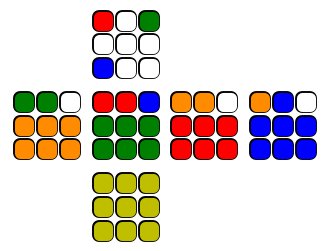

0 129
1: R' U2 R U R' U R (7)
2: R' F' L' U L U2 F U R (9)
3: B' R' F' U F U2 R U B (9)
4: R' U' F U F' U F U2 F' U' R (11)
5: R' U' F R' F' R U F' U' F U R (12)
6: R' U' F' U2 F R U R2 F R F' R (12)
7: R' U' F R' F D' F' D R F' U R (12)
8: R' U' F' U L F' L' F U' F U R (12)
9: R' D' U F U F' U2 F U F' D R (12)
10: R' F' U2 L' U' L F R U R' U R (12)
11: B' R' F' U L' U L U2 F R B (11)
12: R' D' U2 R U R' U R U2 R' D R (12)
13: R' D U2 R U R' U R U2 R' D' R (12)
14: R' U' F U R U' B' R' F' U' R U B (13)
15: R' D' U' F U F' U F U2 F' D U' R (13)
16: R' D U' F U F' U F U2 F' D' U' R (13)
17: R' D2 U2 R U R' U R U2 R' D2 R (12)
18: R' F R' F' R2 U' R' F' L' U' L F R (13)
19: F' U' F' L F L' F R U2 R' F' U F (13)
20: R' U2 R U R' U' F' L' U L U2 F R (13)
21: R' D' L U L' U L U2 L' D U2 R (12)
22: R' D2 U' F U F' U F U2 F' D2 U' R (13)
23: R' U2 R U2 R' F' U F U' R' F R F' R (14)
24: R2 U2 R U2 R U' R' U2 R' U2 R U' R (13)
25: R2 U F2 U2 F U F' U F U2 F U' R2 (13)
26: R' U' F R' D R F' U F R

In [154]:
# i = -1
# i -= 2
i += 1

key = list(LL_algs_dict.keys())[i]
algs_ = LL_algs_dict[key]
algs_ = sorted(algs_, key = lambda x: score_alg(x))
cube = Cube()
cube.apply_int_moves(invert_alg_array(algs_[0]))
cube.plot()
print(i, len(algs_))
for k, alg in enumerate(algs_):
    print(f"{k+1}: {array_to_alg(alg)} ({len(alg)})")

In [733]:
str_LLs = {}
for key in LL_algs_dict:
    str_LLs[key] = [array_to_alg(alg) for alg in LL_algs_dict[key]]

# save to file
with open("_.txt", "w") as f:
    for key in str_LLs:
        f.write(f"{key}: {str_LLs[key]}\n")

In [14]:
# we want a function that gens a specific case

def gen_case(cubestate):
    
    for alg in algs:
        cubestate = _apply_int_moves(cubestate, alg)
        ID = id_from_state(cubestate)
        if ID in table:
            for finish in table[ID]:
                print(array_to_alg(alg) + " "+ array_to_alg(finish))


cubestate = np.array([0, 0, 0, 1, 1, 2, 1, 1, 1, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0, 0, 3,3, 3, 3, 3, 3, 0, 0, 0, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0,0, 5, 5, 5, 5, 5, 5, 5, 5, 5]) # edgeflip
gen_case(cubestate)


In [728]:
# TODO: 
# 1) sort out algs with regrips
# 2) test other start grips
# 3) test other bridge algs

In [279]:
# dictionary of all cases we reach by applying the alg backwards to a cube in state 3
olls_dict = {
    "pll": ['000111111000222222000333333000444444555555555666666666'],
    "sune": ['005111111005222222005333333000444444050555550666666666', '005111111005222222000333333005444444550555050666666666', '005111111000222222005333333005444444055555050666666666', '000111111005222222005333333005444444050555055666666666'],
    "antisune": ['500111111500222222000333333500444444055555050666666666', '500111111000222222500333333500444444050555055666666666', '000111111500222222500333333500444444050555550666666666', '500111111500222222500333333000444444550555050666666666'],
    "pi": ['005111111000222222500333333505444444050555050666666666', '000111111500222222505333333005444444050555050666666666', '500111111505222222005333333000444444050555050666666666', '505111111005222222000333333500444444050555050666666666'],
    "H": ['000111111505222222000333333505444444050555050666666666', '505111111000222222505333333000444444050555050666666666'],
    "L": ['500111111005222222000333333000444444550555055666666666', '005111111000222222000333333500444444055555550666666666', '000111111000222222500333333005444444550555055666666666', '000111111500222222005333333000444444055555550666666666'],
    "T": ['500111111000222222005333333000444444055555055666666666', '000111111005222222000333333500444444050555555666666666', '005111111000222222500333333000444444550555550666666666', '000111111500222222000333333005444444555555050666666666'],
    "U": ['505111111000222222000333333000444444555555050666666666', '000111111000222222000333333505444444055555055666666666', '000111111000222222505333333000444444050555555666666666', '000111111505222222000333333000444444550555550666666666']
}

# invert the olls_dict
oll_dict_ = {}
for key, value in olls_dict.items():
    for v in value:
        oll_dict_[v] = key

def categorize_zblls(zblls):
    '''
    For each item in zblls, apply the first alg backwards to a cube in state 3, and check which subset it belongs to
    Then append the key and value to a new dictionary which is a subset of a new dictionary
    '''
    new_dict = {}
    for key, algs in zblls.items():
        cube = Cube(3)
        cube.apply_int_moves(invert_alg_array(algs[0]))
        case = id_from_state(cube.state)
        if case in oll_dict_:
            if oll_dict_[case] in new_dict:
                new_dict[oll_dict_[case]][key] = algs
            else:
                new_dict[oll_dict_[case]] = {key: algs}
        else:
            print(f"Case {case} not in oll_dict")

    return new_dict

zblls_dict = categorize_zblls(LL_algs_dict)
for key, value in zblls_dict.items():
    print(f"  {key} - {len(value)}")

  sune - 72
  antisune - 72
  T - 72
  L - 72
  U - 72
  pi - 69
  pll - 22
  H - 39


In [314]:
# decide which subset to look at
# subsets: pll, sune, antisune, pi, H, L, T, U

subset = "T"
sorted_subset_keys = sorted(zblls_dict[subset], key = lambda x: score_alg(zblls_dict[subset][x][0]))
print(len(zblls_dict[subset]))
i = -1

72


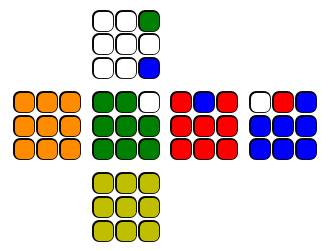

14 75
1. F2 R F U2 R' U R U F' R' F U F (13)
2. F' U' F' R F U' R' U' R U2 F' R' F2 (13)
3. F' U' R U F' U2 R' U' R U' F U' R' F (14)
4. R U F U' R' U R U2 F' U F U2 F' R' (14)
5. F' R U F' U R' U R U2 F U' R' U F (14)
6. R F U2 F' U' F U2 R' U' R U F' U' R' (14)
7. F' U' F D' F' R U' R' U' R U2 R' F D (14)
8. F' R U' F U2 F' U' F U F' U2 R' U2 F (14)
9. F' U2 R U2 F U' F' U F U2 F' U R' F (14)
10. F' R U2 R' U R U R' F D F' U F D' (14)
11. D F' U' F D' F' R U' R' U' R U2 R' F (14)
12. R U2 F U2 F' R' F U F U F U' F U F (15)
13. D' F' R U2 R' U R U R' F D F' U F (14)
14. F' U' F' U' F U F2 D' F2 U F' U' F2 D (14)
15. F2 U F U' F2 D F2 U' F' U F U F D' (14)
16. F' U' F' U F' U' F' U' F' R F U2 F' U2 R' (15)
17. R U2 F' U2 R' U' R U2 F U' F' U2 F U' R' (15)
18. R D' U F' U2 R U R' F D R U' R2 U R (15)
19. R U' F' R' U2 F U' F' U' R F R' U' R U R' (16)
20. D' F2 U F U' F2 D F2 U' F' U F U F (14)
21. D F' U' F' U' F U F2 D' F2 U F' U' F2 (14)
22. R F R' U' R F' R' U2 F2 D F' U' F D' F2 (15

In [329]:
# i -= 2 # -1 overall 
i += 1

key = sorted_subset_keys[i]
algs_ = zblls_dict[subset][key]
cube = Cube()
cube.apply_int_moves(invert_alg_array(algs_[0]))
cube.plot()

print(i, len(algs_)) 
for j, alg in enumerate(algs_):
    print(f"{j+1}. {array_to_alg(alg)} ({len(alg)})")

5000